# Assignment

Name: Kunal Naidu
UCID: 30020999


In this assignment we work with Legendre polynomials and we look at different ways of finding roots of equations. We first look at scipy.optimize.brentq and use that to find the roots for a Legendre polynomial at N=5. Then we explore the secant method which is similar to Newton's method and write a function based off of that. Finally looking at scipy.optimize.newton for the given function "myfunc" and evualting a range of values.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize 

In [2]:
def Legendre(N,x_values):
    """
    Evaluates Legendre Polynomial for a certain x value.
    
    Parameters
    ----------
    N: The N value for Legendre Polynomial
    
    x_values: the value of x of which the Legendre Polynomial is evaluated
    
    Returns
    ---------
    Value of certain Legendre Polynomial at a certain x value.
    
    """
    #creates list for coefficients
    Coe=[]
    for values in range( 0, N):
        Coe.append(0.0)
    Coe[N-1]= 1
    #evaluating legendre polynomial 
    result=np.polynomial.legendre.Legendre(Coe)(x_values)
    return result

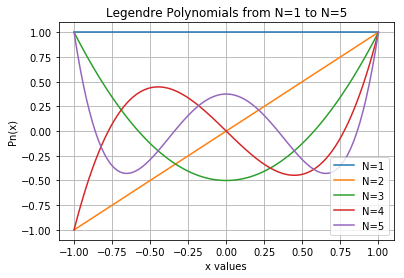

In [3]:
#creating graph
data={}

x_values= np.linspace( -1.0, +1.0, 100)

for Coe in [ 1, 2, 3, 4, 5]:
    data[Coe]= Legendre(Coe,x_values)

for n,l in zip( data.keys(), ['N=1','N=2','N=3','N=4','N=5']):
    plt.plot( x_values, data[n],label=l)

#graph layout
plt.grid('on')
plt.title('Legendre Polynomials from N=1 to N=5')
plt.xlabel('x values')
plt.ylabel('Pn(x)')
plt.legend(loc=0)

In [4]:
def Legendre2(N):
    """
    Evaluates Legendre Polynomial for a certain x value.
    
    Parameters
    ----------
    N: The N value for Legendre Polynomial
    
    x_values: the value of x of which the Legendre Polynomial is evaluated
    
    Returns
    ---------
    Value of certain Legendre Polynomial at a certain x value.
    
    """
    #makes coeffient list
    Coe=[0,0,0,0,0,0,0,0,0]
    #choose coeficient to change
    Coe[N-1]= 1
    #evaulate
    result=np.polynomial.legendre.Legendre(Coe)
    return result




In [41]:
def brentq():
    brentq1=[]
    for values in [1,2,3,4,5]:
        #shifting two values across graph
        a=-1.0
        b=-0.75
        while a <= 1.0 and b <=1.0:
            #try to evaluate. if signs are same skip and if signs are different than evaluate.
            try:
                brentq1.append(scipy.optimize.brentq(Legendre2(values),a,b))
            except ValueError:
                pass
            a=a+0.25
            b=b+0.25
    
    return brentq1
%timeit brentq()
print(brentq())

3.38 ms ± 66 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[0.0, 0.0, -0.5773502691896257, 0.5773502691896257, -0.7745966692414834, 0.0, 0.0, 0.7745966692414834, -0.8611363115940526, -0.33998104358485626, 0.33998104358485626, 0.8611363115940526]


## Secant Method

This method which is similar to Newton's method uses roots of secant lines to approximate a root of a function.

$$
\begin{align}
x_2 &= x_1 - f(x_1)\frac{x_1-x_0}{f(x_1)-f(x_0)} \\
x_3 &= x_2 - f(x_2)\frac{x_2-x_1}{f(x_2)-f(x_1)} \\
&...
\end{align}
$$

In [42]:
result=[]
x_1=-1.0
x_0=-0.75
#shifting two values across graph
while x_1 <= 1.0 and x_0 <=1.0:
    a=0
    #Make the calculation for only 10 times
    while a < 10:
        #evaluate
        x_2=x_1-Legendre(5,x_1)*((x_1-x_0)/(Legendre(5,x_1)-Legendre(5,x_0)))
        #change values for variables for next calculation
        x_0=x_1
        x_1=x_2
        a=a+1
    #append final value to list
    result.append(x_2)
    x_1=x_1+0.25
    x_0=x_0+0.25
print(result)

[nan]


/Users/KunalNaidu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [43]:
#given function
def myfunc(x, b=0.4):
    return b*x - np.tan(x)


x=np.linspace(-1.0,10.0,101)

#evaluate for x
scipy.optimize.newton(myfunc,x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Summary

scipy.optimize.brentq took 3.8ms. The secant method and scipy.optimize.newton did not work. In theory, the secant method would be varaible with accuracy and completion time due to the amount of calculations made. If the amount of calculations made would be proportional to the amount of accuracy but inproportional to the completion time. 

scipy.optimize.brentq uses the bisection method, the secant method and inverse quadratic interpolation to find the roots. It uses the faster methods to cut down on speed but changes back to the more accurate method when it needs to. This would made it somewhat accurate and fast depending on the calculation. 

scipy.optimize.newton in theory is a more accurate way to approximate roots but seems like it would be more time intensive due to the fact that derivates are needed to be taken.